In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [4]:
df = pd.read_csv("Social_Network_Ads.csv")  # Make sure the file is in the correct location
print(df.head())  # Display the first few rows

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [6]:
X = df.iloc[:, [2, 3]].values  # Select "Age" and "EstimatedSalary" as features
y = df.iloc[:, -1].values  # Target column (Purchased or Not)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform training data
X_test = scaler.transform(X_test)  # Only transform test data

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [14]:
y_pred = model.predict(X_test)


In [16]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
TN = cm[0, 0]  # True Negatives
FN = cm[1, 0]  # False Negatives


In [18]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


In [20]:
print("Confusion Matrix:")
print(cm)
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[50  2]
 [ 9 19]]
True Positives (TP): 19
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 9
Accuracy: 0.86
Error Rate: 0.14
Precision: 0.90
Recall: 0.68


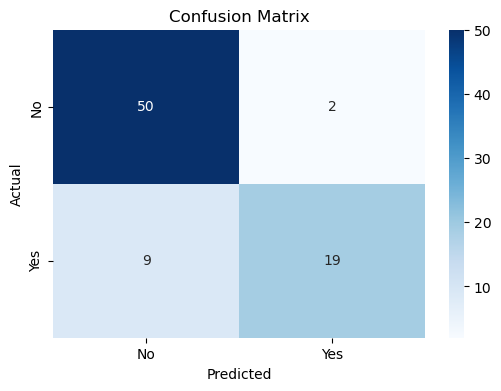

In [22]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
